In [11]:
##import libraries
import numpy as np
import pandas as pd
import os
import pydrive
import matplotlib.pyplot as plt
import torch
from torch.nn.utils.rnn import pad_sequence ##for train_data
import torch.nn as nn
import torch.optim as optim
from IPython.display import clear_output
plt.style.use("classic")
## call class
%run Classes_Archive.ipynb
## load dataset of pulses, for Channel 1 and 2
## dataset = dict("C1":list(t,V),"C2":list(t,V))
Pulse = Data_Pulse()
#Dataset = Pulse.create_dataset()
Pulse.Dataset = Dataset

# Signal Recognition Channel 1 or 2

#### Selection of train data and data for evaluation of the model

In [18]:
## Channel_1 = 1, Channel_2 = 0
train_data,train_label, eval_data,eval_label = Pulse.create_training_data(sample_size=100)

# Run Neural Network

In [ ]:
### Neural Network
## parameters
input_size = 1
hidden_size = 128
num_layers = 2
output_size = 1
NeuralN = PulseLSTM(input_size, hidden_size, num_layers, output_size)
NeuralN.num_layers = num_layers
NeuralN.hidden_size = hidden_size
NeuralN.input_size = input_size
NeuralN.output_size = output_size
NeuralN.train_data = train_data
NeuralN.train_label = train_label
NeuralN.run_neural_netwrok()

C:\Users\sebas\AppData\Local\Temp/ipykernel_18444/2546698859.py:107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data = torch.tensor(train_data).float().unsqueeze(-1)


Epoch 10/100, Loss: 0.6841
Epoch 20/100, Loss: 0.6829


## Evaluate all cases

In [17]:
index = 0
count = 0
for new_pulse in eval_data:
    if NeuralN.pulse_evaluation(new_pulse,eval_label[index]):
        count+=1
    index+=1
print("Accuracy: %1.2f %%"%(100*count/index))

Accuracy: 49.34 %


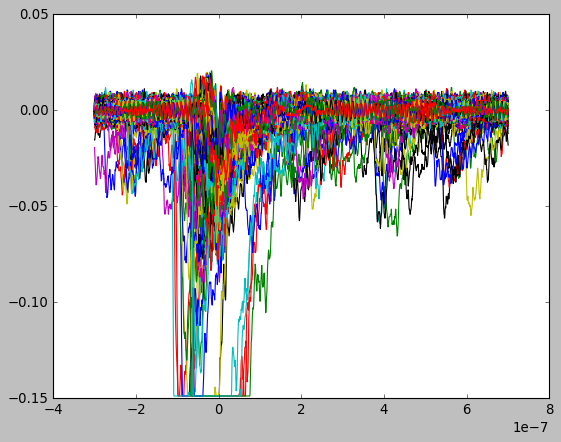

In [41]:
for i in range(len(Pulse.Dataset["C1"])):
    plt.plot(Pulse.Dataset["C1"][i][0,:],Pulse.Dataset["C1"][i][1,:])
plt.grid(True)
plt.show()

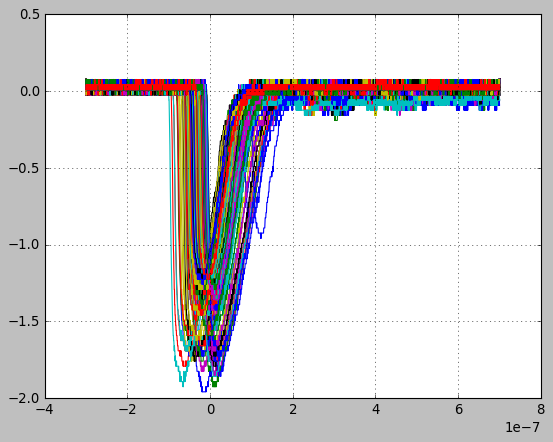

In [43]:
for i in range(len(Pulse.Dataset["C2"])):
    plt.plot(Pulse.Dataset["C2"][i][0,:],Pulse.Dataset["C2"][i][1,:])
plt.grid(True)
plt.show()